In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('/kaggle/input/predict-student-performance-dataset/data.csv')

## **Read Data**

In [3]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


In [4]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


## **Check Data**

In [6]:
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1383    False
1384    False
1385    False
1386    False
1387    False
Length: 1388, dtype: bool

## **Data Analysis**


In [8]:
df[(df['Attendance (%)']>90)]


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
74,0.74427,8.6,7.4,100.0,58.0
561,0.35115,8.1,8.2,92.0,53.0
598,0.65674,8.8,5.4,98.0,58.0
786,0.83476,8.3,7.2,98.0,59.0
830,0.90524,9.2,7.5,99.0,67.0
841,0.77791,8.4,8.4,93.0,59.0
842,0.48282,8.6,6.2,93.0,58.0
872,0.79123,8.8,5.9,92.0,61.0
985,0.68971,8.4,8.4,98.0,56.0
1077,0.86712,8.1,8.2,93.0,61.0


In [9]:
df[(df['Grades']>70)]


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
37,0.99789,9.5,7.1,41.0,88.0
456,0.95218,7.9,8.4,58.0,72.0
518,0.94391,9.7,6.8,81.0,76.0
556,0.99361,9.9,6.6,57.0,91.0
823,0.98776,7.1,7.5,60.0,73.0
843,0.99599,7.6,8.9,68.0,77.0
925,0.99033,8.1,8.2,74.0,80.0
1034,0.94074,8.6,7.7,81.0,73.0
1086,0.98429,8.7,5.9,86.0,78.0
1336,0.99982,7.1,9.0,48.0,74.0


In [10]:
df['Grades'].value_counts()


Grades
34.0    349
35.0    194
33.0    167
36.0     47
47.0     33
50.0     31
37.0     30
40.0     30
41.0     28
46.0     28
42.0     27
53.0     26
44.0     26
51.0     26
52.0     25
48.0     25
39.0     25
38.0     24
32.0     24
49.0     23
45.0     23
54.0     21
58.0     16
55.0     14
59.0     13
43.0     13
57.0     13
56.0     12
60.0     11
61.0     10
63.0      9
62.0      9
67.0      7
64.0      7
70.0      4
66.0      3
65.0      3
73.0      2
88.0      1
72.0      1
76.0      1
91.0      1
77.0      1
80.0      1
78.0      1
69.0      1
68.0      1
74.0      1
Name: count, dtype: int64

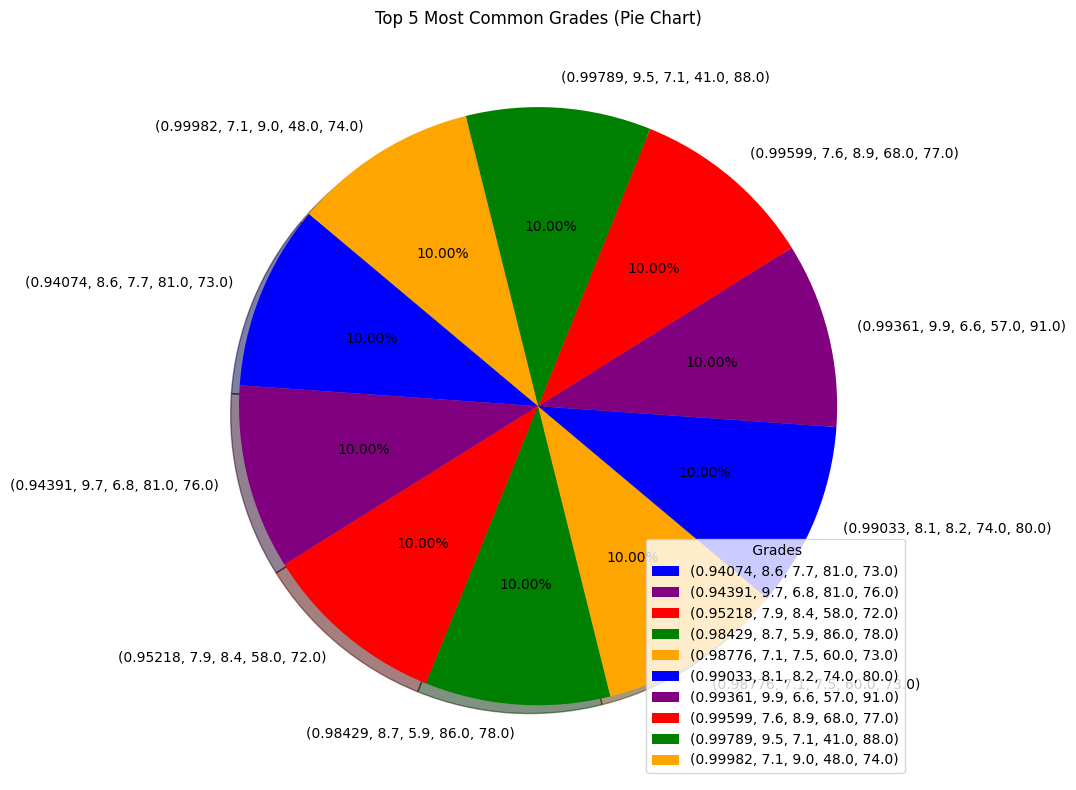

In [11]:
# Create a pie chart for the top 5 most common reviews
top_reviews = df[(df['Grades']>70)].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    top_reviews.values,
    labels=top_reviews.index,
    
    
    autopct="%1.2f%%",
    colors=['Blue', 'Purple', 'Red', 'Green', 'Orange'],
    shadow=True,
    startangle=140
)
plt.title('Top 5 Most Common Grades (Pie Chart)')
plt.legend(title=' Grades', loc='best')
plt.tight_layout()
plt.show()

In [12]:
df['Attendance (%)'].value_counts()

Attendance (%)
51.0     55
57.0     54
47.0     48
55.0     48
59.0     46
58.0     46
46.0     45
60.0     45
61.0     44
45.0     43
49.0     42
52.0     40
66.0     40
56.0     39
53.0     39
63.0     38
42.0     35
67.0     35
54.0     35
62.0     33
65.0     33
69.0     33
68.0     33
43.0     32
50.0     32
64.0     32
48.0     30
41.0     28
44.0     28
72.0     25
71.0     24
40.0     24
70.0     22
73.0     19
75.0     19
74.0     13
78.0     13
83.0     12
79.0     10
76.0     10
77.0      9
81.0      8
84.0      7
80.0      5
86.0      5
93.0      4
87.0      4
85.0      3
90.0      3
98.0      3
95.0      2
88.0      2
82.0      2
92.0      2
89.0      2
99.0      1
96.0      1
94.0      1
100.0     1
97.0      1
Name: count, dtype: int64

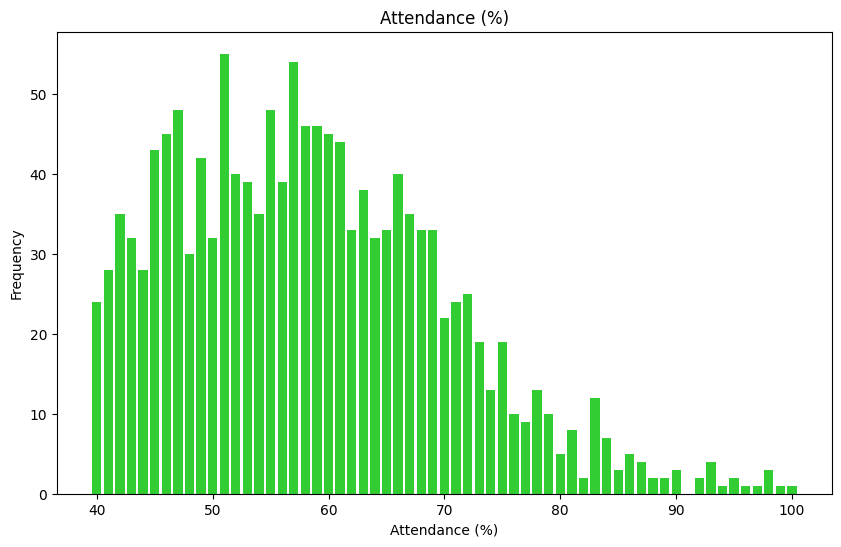

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(df['Attendance (%)'].value_counts().index, df['Attendance (%)'].value_counts().values, color='limegreen')
plt.title('Attendance (%)')
plt.xlabel('Attendance (%)')
plt.ylabel('Frequency')

plt.show()

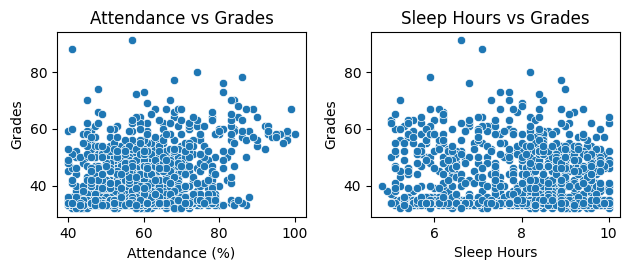

In [14]:
plt.subplot(2, 2, 3)
sns.scatterplot(x='Attendance (%)', y='Grades', data=df)
plt.title("Attendance vs Grades")

plt.subplot(2, 2, 4)
sns.scatterplot(x='Sleep Hours', y='Grades', data=df)
plt.title("Sleep Hours vs Grades")

plt.tight_layout()
plt.show()

**Define Target and featcher**

In [15]:
X = df.drop(columns=['Grades'])
y = df['Grades']


**Data Encoding**


In [16]:
X.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
0,0.95822,3.4,8.2,53.0
1,0.85566,3.2,5.9,55.0
2,0.68025,3.2,9.3,41.0
3,0.25936,3.2,8.2,47.0
4,0.60447,3.8,10.0,75.0


## **Data Modeling**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Socioeconomic Score'] = scaler.fit_transform(df[['Socioeconomic Score']])
df['Study Hours'] = scaler.fit_transform(df[['Study Hours']])
df['Sleep Hours'] = scaler.fit_transform(df[['Sleep Hours']])
df['Attendance (%)'] = scaler.fit_transform(df[['Attendance (%)']])
df['Grades'] = scaler.fit_transform(df[['Grades']])

In [18]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.953703,0.282609,0.653846,0.216667,0.254237
1,0.839562,0.260870,0.211538,0.250000,0.050847
2,0.644345,0.260870,0.865385,0.016667,0.000000
3,0.175930,0.260870,0.653846,0.116667,0.033898
4,0.560008,0.326087,1.000000,0.583333,0.016949
...,...,...,...,...,...
1383,0.383077,0.510870,0.615385,0.183333,0.152542
1384,0.471187,0.445652,0.326923,0.383333,0.084746
1385,0.868843,0.336957,0.269231,0.233333,0.067797
1386,0.414094,0.293478,0.480769,0.350000,0.033898


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_train


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
479,0.29793,3.8,8.5,74.0
351,0.14741,8.2,6.1,90.0
1192,0.79470,6.7,7.2,67.0
135,0.31144,6.0,8.7,82.0
567,0.62507,3.7,6.6,51.0
...,...,...,...,...
1095,0.99183,5.3,7.7,57.0
1130,0.59165,3.5,8.3,54.0
1294,0.48080,5.8,8.6,51.0
860,0.26835,4.4,6.6,63.0


In [22]:
y_train


479     35.0
351     54.0
1192    48.0
135     42.0
567     34.0
        ... 
1095    63.0
1130    33.0
1294    41.0
860     34.0
1126    33.0
Name: Grades, Length: 1041, dtype: float64

In [23]:
print( f'The model accuracy is ',lr.score(X_test, y_test))

The model accuracy is  0.7402944220304374


In [24]:
y_pred = lr.predict(X_test)


In [25]:
print(mean_squared_error(y_test, y_pred))


19.33454527025313


In [26]:
print(mean_absolute_error(y_test, y_pred))


3.4042231490418366


In [27]:
r2 = r2_score(y_pred, y_test)
print( f'The model r2 score is ',r2)

The model r2 score is  0.6620532529548768
